In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv( "Data.csv" )
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


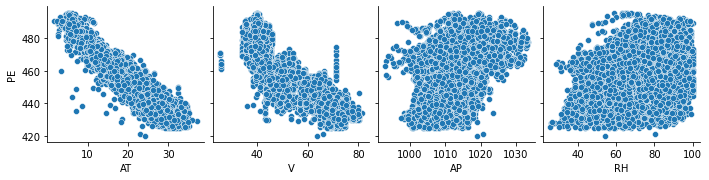

In [8]:
import seaborn as sns
%matplotlib inline

sns.pairplot( data = df, x_vars = ["AT", "V", "AP", "RH"], y_vars = "PE" )

In [9]:
X = np.array( df.iloc[:, :-1] )
y = np.array( df.iloc[:, -1] )
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [10]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
linreg = LinearRegression( )
linreg.fit( X_train, y_train )
scores = { "Linear Regression" : linreg.score( X_test, y_test ) }
scores

{'Linear Regression': 0.9237380192128435}

In [18]:
svr = SVR( kernel = "linear" )
svr.fit( X_train, y_train )
scores.update( { "SVR" : svr.score( X_test, y_test ) } )
scores

{'Linear Regression': 0.9237380192128435, 'SVR': 0.9231853948338609}

In [19]:
tree = DecisionTreeRegressor( )
tree.fit( X_train, y_train )
scores.update( { "DecisionTree" : tree.score( X_test, y_test ) } )
scores

{'Linear Regression': 0.9237380192128435,
 'SVR': 0.9231853948338609,
 'DecisionTree': 0.9233932552901747}

In [20]:
forest = RandomForestRegressor( n_estimators = 10, n_jobs = -1 )
forest.fit( X_train, y_train )
scores.update( { "RandomForest" : forest.score( X_test, y_test ) } )
scores

{'Linear Regression': 0.9237380192128435,
 'SVR': 0.9231853948338609,
 'DecisionTree': 0.9233932552901747,
 'RandomForest': 0.9543192423545416}

In [24]:
poly_reg = PolynomialFeatures( degree = 4 )
X_poly = poly_reg.fit_transform( X_train )
polyreg = LinearRegression( )
polyreg.fit( X_poly, y_train )
scores.update( { "Polynomial Regression" : polyreg.score( poly_reg.transform( X_test ), y_test ) } )
scores

{'Linear Regression': 0.9237380192128435,
 'SVR': 0.9231853948338609,
 'DecisionTree': 0.9233932552901747,
 'RandomForest': 0.9543192423545416,
 'Polynomial Regression': 0.9376426361774317}